`CURRENT_TIMESTAMP` и `NOW()` - Функции для вывода текущего значения даты и времени. Тип - **TIMESTAMP**. Отображает время по гринвичу (без привязки к часовому поясу)

```sql
SELECT NOW()
```

```sql
SELECT CURRENT_TIMESTAMP()
```

---

**Timestamp with time zone** позволяет хранить сведения о часовом поясе, что может быть удобно при анализе географически распределённых временных данных для единообразия хранения.

```sql
show timezone -- команда, позволяющая узнать, в каком часовом поясе выводятся временнные данный в настоящий момент
```

Список часовых поясов можно увидеть в системном справочнике:

```sql
SELECT *
FROM pg_timezone_names
```

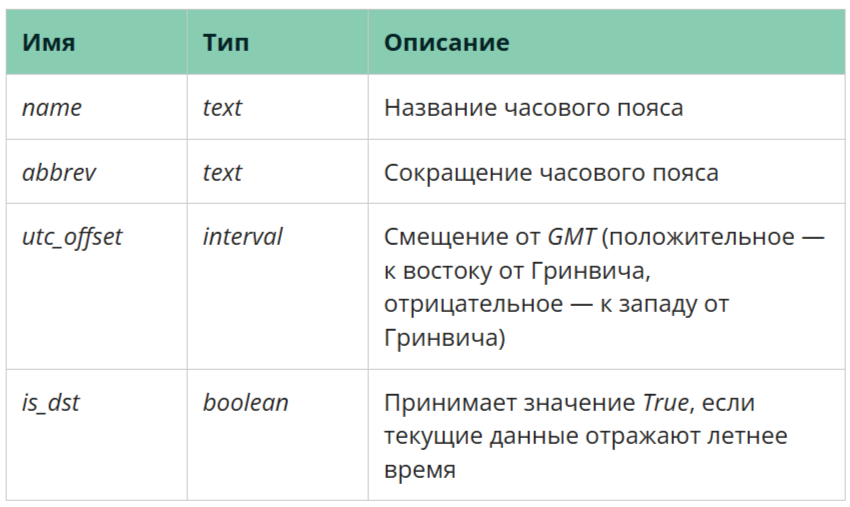

Для того, чтобы посмотреть какое сейчас время в каком_нибудь часовом поясе, выполнить запрос:

```sql
SELECT now() at time zone 'Europe/Moskow'
```

---

Тип данных `DATE` 

Тип *timestamp (with/without time zone)* можно перевести в соответствующую дату, используя синтаксис

```sql
"timestamp_column"::date
``

И наоборот, тип date преобразуется в timestamp (дата и 00:00:00) с помощью
```sql
"date_column"::timestamp
```

Для получения текущей даты можно использовать
```sql
SELECT CURRENT_DATE
-- ИЛИ
SELECT now()::date
```

---

`extract()` - Функция, которая получает из значений даты/времени такие поля, как год или час.

**Источник** — значение типа `timestamp`, `time` или `interval`. Допускается и тип date, поскольку он приводится к типу `timestamp`.

Функция `extract()` возвращает значения типа *double precision*.

**DAY**

Для значений `timestamp` это день месяца (1-31), для значений `interval` — число дней.
```sql
SELECT EXTRACT(DAY FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 16
``` 

```sql
SELECT EXTRACT(DAY FROM INTERVAL '40 days 1 minute');

Результат: 40
```

**HOUR**

Час (0-23).

```sql
SELECT EXTRACT(HOUR FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 20
```

**MONTH**

Номер месяца, считая с января (1) до декабря (12).

```SQL
SELECT EXTRACT(MONTH FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 2
```

**YEAR**

Поле года. Учтите, что года 0 не было.

```SQL
SELECT EXTRACT(YEAR FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 2001
```

**ISOYEAR**

Год по недельному календарю *ISO 8601*, в который попадает дата (*не применимо к интервалам*).

```SQL
SELECT EXTRACT(ISOYEAR FROM DATE '2006-01-01');

Результат: 2005

SELECT EXTRACT(ISOYEAR FROM DATE '2006-01-02');

Результат: 2006
```

**WEEK**

Для получения согласованных результатов рекомендуется использовать поле isoyear в паре с week.

```SQL
SELECT EXTRACT(WEEK FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 7
```

**CENTURY**

ВЕК

```SQL
SELECT EXTRACT(CENTURY FROM TIMESTAMP '2000-12-16 12:21:13');
Результат: 20

SELECT EXTRACT(CENTURY FROM TIMESTAMP '2001-02-16 20:38:40');
Результат: 21
```

Века с номером 0 не было; считается, что 1 наступил после -1.


**DECADE**

Десятилетие.
```SQL
SELECT EXTRACT(DECADE FROM TIMESTAMP '2001-02-16 20:38:40');
Результат: 200
```

**EPOCH**

Для значений *timestamp with time zone* это число секунд с 1970-01-01 00:00:00 UTC (может быть отрицательным); для значений *date* и *timestamp* это число секунд с 1970-01-01 00:00:00 по местному времени, а для *interval* — общая длительность интервала в секундах.

```SQL
SELECT EXTRACT(EPOCH FROM TIMESTAMP WITH TIME ZONE
'2001-02-16 20:38:40.12-08');
Результат: 982384720.12

SELECT EXTRACT(EPOCH FROM INTERVAL '5 days 3 hours');
Результат: 442800
```

Преобразовать время эпохи обратно, в значение дата/время, с помощью `to_timestamp` можно так:

```SQL
SELECT to_timestamp(982384720.12);
Результат: 2001-02-17 04:38:40.12+00
```

**DOW**

День недели, считая с воскресенья (0) до субботы (6).

```SQL
SELECT EXTRACT(DOW FROM TIMESTAMP '2001-02-16 20:38:40');
Результат: 5
```

**DOY**

День года (1-365/366).

```SQL
SELECT EXTRACT(DOY FROM TIMESTAMP '2001-02-16 20:38:40');
Результат: 47
```

**ISODOW**

День недели, считая с понедельника (1) до воскресенья (7).

```SQL
SELECT EXTRACT(ISODOW FROM TIMESTAMP '2001-02-18 20:38:40');
Результат: 7
```

Результат отличается от dow только для воскресенья. Такая нумерация соответствует ISO 8601.

---

`TO_CHAR()` - Функция для форматирования даты времени и интервалов в нужный текст

Предположим, мы хотим вывести сегодняшнюю дату в формате `"Hello! Today is #название дня недели год.название месяца.день#"` текстом. Для этого нужно выполнить следующий код: 

```sql
SELECT TO_CHAR(now(), '"Hello! Today is" DAY yyy-Mon-dd')
```

сообщение нужно вывести для московского часового пояса:
```sql
SELECT TO_CHAR(CURRENT_TIMESTAMP AT TIME ZONE 'MSK', '"Точное время" HH24 "часов" MI "минут" SS "секунд"') as msg
```

---

`date_trunc()` - Функция, которая позволяет отсечь заданное время, дату или дату со временем до нужной точности.

**Формат вызова:**

`date_trunc('поле', значение)`

Например, если мы хотим округлить текущее время-дату до минут, то можно вызвать

```sql
SELECT DATE_TRUNC('minute', now())
```

Для получения разной степени точности вместо minute можно использовать следующие параметры:

- `microseconds`;
- `milliseconds`;
- `second`;
- `minute`;
- `hour`;
- `day`;
- `week`;
- `month`;
- `quarter`;
- `year`;
- `decade`;
- `century`;
- `millennium`.

К любой дате можно прибавить (и вычесть из неё) целое число X и получить другую дату, которая больше (меньше) изначальной.

```sql
SELECT '2019-01-01'::date + 10
```

---

**СТРОКИ**

**character** - Тип - строка фиксированной длины, дополненная пробелами.
Длина строки такого типа всегда одинакова и задаётся в скобках.

Основной паттерн **использования** такого типа — универсальные справочники буквенных кодов


**character varying** - Строка ограниченной переменной длины.

Например, в столбце типа *character varying(5)* нельзя будет хранить строку большей длины, но могут быть любые строки с меньшей длиной.

Этот тип данных повсеместно используется для хранения данных, поскольку позволяет ограничить ввод, сохраняя при этом возможность иметь строки произвольной длины.

**text** - Cтрока неограниченной длины.

Самый удобный тип для пользователя, но самый тяжеловесный для администратора баз данных, так как в строку можно записать любой текст.

`||` - Оператор конкатенации (соединения) строк. Позволяет объединить 2 и более строк.

Конструкции с оператором соединения строк записываются следующим образом:

`строка1 || строка2 || ... || строкаN`

Результатом соединения любых типов строковых данных будет тип *text*.

**Пример**

```sql
SELECT 'select * from ' ||t.table_schema||'.'||t.table_name||';'query
FROM
    information_schema.tables as t
WHERE table_schema = 'shipping'
```

`COALESCE` - функция в SQL, которая возвращает **первое непустое значение** из списка аргументов. Это позволяет: 

- `Обрабатывать пропущенные значения` — заполнять пропущенные или *NULL*-значения в столбцах.
- `Создавать псевдонимы для пустых столбцов`, что позволяет отображать более понятные данные в результатах запросов.
- `Предотвращать ошибки при обработке нулевых значений` в операциях или сравнениях — функция гарантирует, что операции будут выполняться с действительными данными.
- `Упрощать логику запросов` — COALESCE устраняет необходимость в явных проверках на NULL.

**Синтаксис**
```sql
COALESCE(expression1, expression2, expression3, ...). Здесь: 
```
expression1, expression2, expression3 — выражения или значения, которые нужно оценить. 

Аргументы должны быть приводимыми к одному общему типу, который и будет типом результата.

```sql
select
    'Ваш заказ доставит водитель '||first_name||' '||last_name||'.'||' '||'Его контактный номер: '|| COALESCE(phone, '-') as msg
from
    sql.driver
```

---

`upper(your_text)` и `lower(your_text)` -Функции, которые переводят каждый символ вашего текста в верхний и нижний регистр соответственно.

```sql
select upper('Abc') s1 ,lower('xYz') s2
```

`replace()` - Функция, с помощью которой можно заменять символы в строках.

`replace(string text (где?), from text (что?), to text (на что?))`

```sql
select replace('малако','а','о')
```

>Если вы хотите удалить из строки какие-то символы, то третьим параметром (to) передайте пустую строку ''(одинарные кавычки без символа внутри).

Например, сделаем из строки "Hello, world!" строку "Hello!".

```sql
select replace('Hello, world!',', world','')
```

---

`left(string,n)` и `right(string,n)` - Функции, которые оставляют n левых или правых символов от строки, поданной на вход.

```sql
with t as
(
select 'Один два три'::text sample_string
)
select 
 left(t.sample_string,4) one, /*берём 4 левых символа строки*/
 right(left(t.sample_string,8),3) two, /*берём 8 левых символов строки, потом 3 правых от результата*/
 right(t.sample_string,3) three /*берём 3 правых символа от строки*/
from t

`format()` - используется для составления форматированного текста с подстановками. 

**Синтаксис:**

`format(formatstr text [, argument1 text,argument2 text...])`

где `formatstr` — это шаблон, который мы передаём. Это обычная строка, в которой указаны места для подстановки аргумента.

```sql
SELECT format('Hello, %s!', d.first_name) from shipping.driver as d
```

Если в вашем шаблоне присутствует одинарная кавычка, то для удобства можно вместо одинарных кавычек использовать $$ (два знака доллара):

```sql
select $$ some_string with quotes ' $$
```